# Convolutional Neural Network

A convolutional neural network (CNN) is a type of artificial neural network used primarily for image recognition and processing, due to its ability to recognize patterns in images. A CNN is a powerful tool but requires millions of labelled data points for training. CNNs must be trained with high-power processors, such as a GPU or an NPU, if they are to produce results quickly enough to be useful.

While CNNs are designed to solve problems with visual imagery, they also have many applications outside of image recognition and analysis, including image classification, natural language processing, drug discovery, and health risk assessments. 

#### Credits: [arm](https://www.arm.com/glossary/convolutional-neural-network#:~:text=A%20convolutional%20neural%20network%20(CNN)%20is%20a%20type%20of%20artificial,labelled%20data%20points%20for%20training.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('data/image_data.npz')
X_data = data['images']

target = pd.read_csv('data/csv/BrainTumor.csv')
Y = np.array(target['Class'])

scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape X_data for efficient scaling (each row represents a flattened image)
reshaped_X = X_data.reshape(-1, 240 * 240 * 3)

# Apply MinMaxScaler to normalize the image data
X_data_scaled = scaler.fit_transform(reshaped_X)

# Reshape back to the original format
X_data_scaled = X_data_scaled.reshape(X_data.shape)

In [3]:
print(Y)

[0 0 1 ... 0 0 0]


### One Hot Encode Target and Split Data into Test and Training

In [4]:
from tensorflow.keras.utils import to_categorical

Y_label = to_categorical(Y, num_classes=2)
print(Y_label[:5])
print(Y_label.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_data_scaled, Y_label, test_size=0.2, random_state=42)

2024-06-20 19:15:43.070330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
(3762, 2)


## An unregularized model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
input_shape = (240, 240, 3)

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=2, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/Users/kingsleybudu/Desktop/brain_tumor_model/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    27,558,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,585,794 (105.23 MB)

 Trainable params: 27,585,794 (105.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.7352 - loss: 0.5629 - val_accuracy: 0.7043 - val_loss: 0.5989
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8518 - loss: 0.3372 - val_accuracy: 0.8555 - val_loss: 0.3423
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.9183 - loss: 0.1981 - val_accuracy: 0.8654 - val_loss: 0.3698
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9435 - loss: 0.1421 - val_accuracy: 0.8837 - val_loss: 0.2985
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.9747 - loss: 0.0820 - val_accuracy: 0.8787 - val_loss: 0.3447
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.9705 - loss: 0.0773 - val_accuracy: 0.8821 - val_loss: 0.3790
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9931 - loss: 0.0204 - val_accuracy: 0.9020 - val_loss: 0.3261
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9037 - v

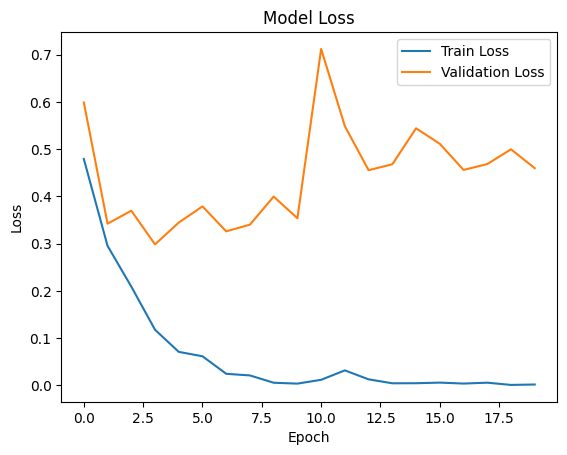

In [25]:
history = model.fit(X_train, Y_train, epochs = 20, validation_split=0.2)

# plot training vs Validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training Performance:

- **accuracy:** 1.0000: This shows that the model achieved 100% accuracy on the training data after 20 epochs. However, this might mean the model is overfitting, where the model performs very well on the training data but might not generalize well to unseen data.

- **loss:** 4.8868e-05: This is the training loss, which is a very small value (less than 0.0001) suggesting the model is performing well on the training set.


### Validation Performance:

- **val_accuracy:** 0.9153: This shows the accuracy on the validation set, which is 91.53%. This is a more realistic measure of the model's ability to generalize to unseen data.

- **val_loss:** 0.4352: This is the validation loss, which is a moderate value (around 0.4). While the training loss is very low, the validation loss suggests there might be room for improvement in generalizability.


### Analysis

The gap between training and validation performance suggests potential overfitting. The model might be memorizing the training data too well and not generalizing well to unseen data (as reflected by the lower validation accuracy).

## Implement Regularization Techniques

L2 regularization is a technique used in machine learning to combat overfitting, a situation where a model memorizes the training data too well and performs poorly on unseen data. It works by adding a penalty term to the model's loss function based on the magnitude of its weights. This discourages the model from relying heavily on specific features in the training data, promoting a more even distribution of importance and ultimately leading to a simpler, more generalizable model that performs better on unseen examples. 

In [9]:
from tensorflow.keras.regularizers import L2

input_shape = (240, 240, 3)

reg_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=2, activation='softmax')
])
reg_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

reg_model.summary()

/Users/kingsleybudu/Desktop/brain_tumor_model/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 215296)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    27,558,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,585,794 (105.23 MB)

 Trainable params: 27,585,794 (105.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7325 - loss: 1.0092 - val_accuracy: 0.8455 - val_loss: 0.5348
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8806 - loss: 0.4721 - val_accuracy: 0.8671 - val_loss: 0.4910
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9057 - loss: 0.4039 - val_accuracy: 0.8422 - val_loss: 0.5124
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9382 - loss: 0.3285 - val_accuracy: 0.8854 - val_loss: 0.4160
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9554 - loss: 0.2699 - val_accuracy: 0.8455 - val_loss: 0.5049
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9637 - loss: 0.2486 - val_accuracy: 0.8738 - val_loss: 0.5276
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9715 - loss: 0.2248 - val_accuracy: 0.9136 - val_loss: 0.3756
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9873 - loss: 0.1644 - val_accuracy: 0.8821 - v

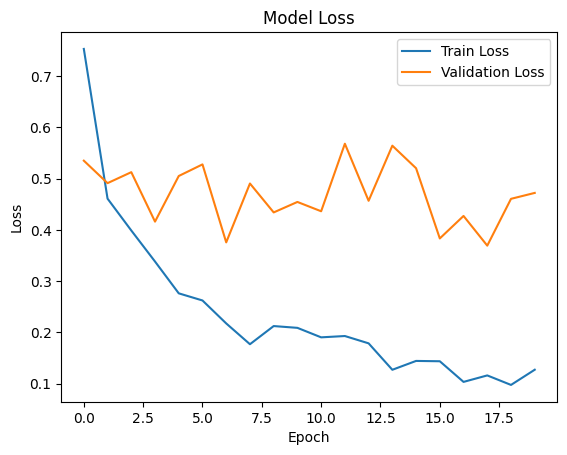

In [27]:
history = reg_model.fit(X_train, Y_train, epochs = 20, validation_split=0.2)

# plot training vs Validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training Performance:

- **accuracy:** 0.9789: This indicates that the model achieved an accuracy of 97.89% on the training data after 20 epochs. This is a high accuracy, suggesting the model learned the training data well.

- **loss:** 0.1409: The loss value represents the average error between the model's predictions and the actual labels in the training data. A lower loss value signifies better performance.

### Validation Performance:

- **val_accuracy:** 0.8870: This shows the model's accuracy on a separate validation dataset (not used for training). An accuracy of 88.70% on validation data indicates good generalization, meaning the model might perform well on unseen data.

- **val_loss:** 0.4164: The validation loss is higher than the training loss, which is typical. However, it's still a relatively low value.

### Analysis

**L2 Regularization:** L2 regularization helped by penalizing large weights in the network, encouraging the model to focus on learning more generalizable features.

Overall, these results suggest that the CNN achieved good performance on the training data with L2 regularization helping to prevent overfitting. The validation accuracy suggests the model might generalize well to unseen data, but further evaluation might be needed for confirmation.

## Early Stopping and L2 Regularization

Early stopping acts like a wise tutor, monitoring the model's performance on a separate validation dataset (data the model hasn't seen during training). If the model's performance on the validation data stops improving for a certain number of epochs (training iterations), early stopping steps in and halts the training process. This prevents the model from overfitting to the training data's specific details and encourages it to focus on learning more generalizable patterns that will work well on unseen examples.

In [34]:
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

input_shape = (240, 240, 3)

cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.01)),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.01)),
    Dense(units=2, activation='softmax')
])

# Compile the model with early stopping
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7236 - loss: 2.2512 - val_accuracy: 0.7841 - val_loss: 0.9888
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8493 - loss: 0.8557 - val_accuracy: 0.8256 - val_loss: 0.7536
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.8085 - loss: 0.7486 - val_accuracy: 0.8322 - val_loss: 0.6772
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8579 - loss: 0.5884 - val_accuracy: 0.8156 - val_loss: 0.6668
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.8878 - loss: 0.5172 - val_accuracy: 0.8771 - val_loss: 0.5273
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8927 - loss: 0.4519 - val_accuracy: 0.8887 - val_loss: 0.4708
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9203 - loss: 0.3876 - val_accuracy: 0.8887 - val_loss: 0.4520
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9235 - loss: 0.3730 - val_accuracy: 0.8638 - val

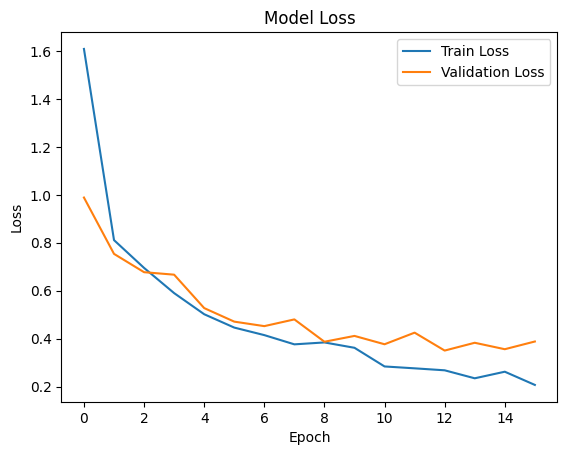

In [35]:
history = cnn_model.fit(X_train, Y_train, epochs = 20, validation_split=0.2, callbacks=[early_stopping])

# plot training vs Validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training Performance:

- **accuracy:** 0.9501: This indicates that the model achieved an accuracy of 95.01% on the training data after 15 epochs. This is a high accuracy, suggesting the model learned the training data well.

- **loss:** 0.2676: The loss value represents the average error between the model's predictions and the actual labels in the training data. A lower loss value signifies better performance.


### Validation Performance:

- **val_accuracy:** 0.9036: This shows the model's accuracy on a separate validation dataset (not used for training). An accuracy of 90.36% on validation data indicates good generalization, meaning the model might perform well on unseen data.

- **val_loss:** 0.3501: The validation loss is higher than the training loss, which is typical. However, it's still a relatively low value.


### Analysis

- Early Stopping monitored the validation loss and stopped training the model at the 16th epoch because it failed to improve for 3 epochs. The best model was restored corresponding to the values at epoch 12.

- L2 regularization was used to prevent the model from overfitting to the training data.

**Overall:**

These results suggest that the CNN achieved good performance on the training data with L2 regularization helping to prevent overfitting. The validation accuracy indicates the model might generalize well to unseen data. 

## Evaluate the Test Data

In [38]:
stats = cnn_model.evaluate(X_test, Y_test)

print(stats)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9208 - loss: 0.3230
[0.3335122764110565, 0.9189907312393188]


### Evaluation results with unseen data

- **loss:** 0.3335 represents the loss on the test data. Low loss values indicates better model performance.

- **Accuracy:** 91.9%: The model was able to correctly classify 91.9% of the examples within the test_data

## Plot 10 Images and Model Prediction

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step


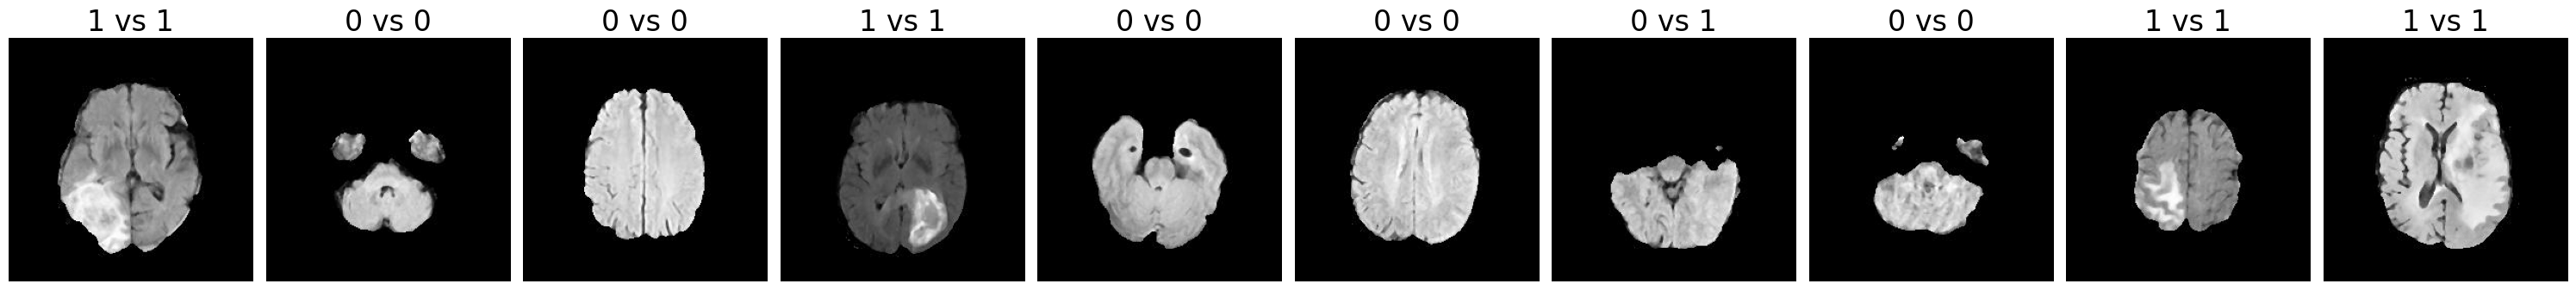

In [39]:
y_predicted = cnn_model.predict(X_test)

num_images_to_plot = 10  
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(30, 30))

for i in range(num_images_to_plot):
  # Assuming images are flattened in X_test, reshape for plotting
  image = X_test[i].reshape((240, 240, 3)) 
  axes[i].imshow(image)
  
  true_label = np.argmax(Y_test[i])
  predicted_label = np.argmax(y_predicted[i])
  
  axes[i].set_title(f"{true_label} vs {predicted_label}", fontsize=24)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

## Save the model as h5

In [40]:
import joblib

cnn_model.save('../model/braintumor.h5')
joblib.dump(model, '../model/braintumor.pkl')

## Confusion Matrix

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('../model/braintumor.h5')

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step


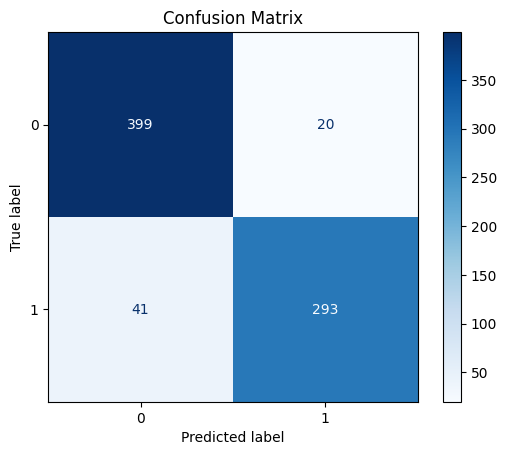

In [6]:
# Make predictions on the validation set
y_val_pred = model.predict(X_test)

# Convert predictions and actual values from one-hot encoded to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
Y_val_classes = np.argmax(Y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val_classes, y_val_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()